# Wafer Model Evaluation

In [1]:
import pandas as pd

In [2]:
df_feature = pd.read_csv('C:/Users/user/Desktop/AI & ML/Project/Wafer_X_train.csv',index_col='file_name')
df_featuret = pd.read_csv('C:/Users/user/Desktop/AI & ML/Project/Wafer_X_test.csv',index_col='file_name')

In [3]:
accuracy_list = []
sensitivity_score = []
specificity_score = []

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

df_feature = shuffle(df_feature)

X_train = df_feature.drop(['label'],axis=1)
y_train = df_feature['label']
X_test = df_featuret.drop(['label'],axis=1)
y_test = df_featuret['label']

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [5]:
RFC_METRIC = 'entropy'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = -1 #number of parallel jobs used for RandomForrestClassifier
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=2000,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

scores_RF = cross_val_score(clf, X_train, y_train, cv=5)
scores_RF


array([0.99837794, 0.99675588, 0.99837794, 0.99918897, 0.99918831])

In [6]:
clf.fit(X_train,y_train)
pred1 = clf.predict(X_test)
acc_score_RF = accuracy_score(y_test,pred1)
acc_score_RF

1.0

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred1)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

Sensitivity_RF = TP / (TP + FN)
Specificity_RF = TN / (TN + FP)

print(F"Sensitivity is { Sensitivity_RF }")
print(F"Specificity is { Specificity_RF }")

Sensitivity is 1.0
Specificity is 1.0


In [8]:
accuracy_list.append(acc_score_RF)
sensitivity_score.append(Sensitivity_RF)
specificity_score.append(Specificity_RF)

In [9]:
from sklearn import svm
clf_svm1 = svm.SVC(kernel='linear', C=1)
scores_svm1 = cross_val_score(clf_svm1, X_train, y_train, cv=5)
scores_svm1

array([0.99675588, 0.99918897, 1.        , 0.99837794, 0.99918831])

In [10]:
clf_svm1.fit(X_train,y_train)
pred2 = clf_svm1.predict(X_test)
acc_score_svm1 = accuracy_score(y_test,pred2)
acc_score_svm1

0.999

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred2)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

Sensitivity_svm1 = TP / (TP + FN)
Specificity_svm1 = TN / (TN + FP)

print(F"Sensitivity is { Sensitivity_svm1 }")
print(F"Specificity is { Specificity_svm1 }")

Sensitivity is 0.9897959183673469
Specificity is 1.0


In [12]:
accuracy_list.append(acc_score_svm1)
sensitivity_score.append(Sensitivity_svm1)
specificity_score.append(Specificity_svm1)

In [13]:
clf_svm2 = svm.SVC(kernel='rbf', C=1)
scores_svm2 = cross_val_score(clf_svm2, X_train, y_train, cv=5)
scores_svm2

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

array([0.99675588, 0.99675588, 0.99918897, 0.99918897, 0.99837662])

In [14]:
clf_svm2.fit(X_train,y_train)
pred2 = clf_svm2.predict(X_test)
acc_score_svm2 = accuracy_score(y_test,pred2)
acc_score_svm2

0.998

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred2)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

Sensitivity_svm2 = TP / (TP + FN)
Specificity_svm2 = TN / (TN + FP)

print(F"Sensitivity is { Sensitivity_svm2 }")
print(F"Specificity is { Specificity_svm2 }")

Sensitivity is 0.9797979797979798
Specificity is 1.0


In [16]:
accuracy_list.append(acc_score_svm2)
sensitivity_score.append(Sensitivity_svm2)
specificity_score.append(Specificity_svm2)

In [17]:
clf_svm3 = svm.SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
scores_svm3 = cross_val_score(clf_svm3, X_train, y_train, cv=5)
scores_svm3

array([0.99756691, 1.        , 0.99918897, 0.99756691, 0.99837662])

In [18]:
clf_svm3.fit(X_train,y_train)
pred3 = clf_svm3.predict(X_test)
acc_score_svm3 = accuracy_score(y_test,pred3)
acc_score_svm3

0.998

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred2)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

Sensitivity_svm3 = TP / (TP + FN)
Specificity_svm3 = TN / (TN + FP)

print(F"Sensitivity is { Sensitivity_svm3 }")
print(F"Specificity is { Specificity_svm3 }")

Sensitivity is 0.9797979797979798
Specificity is 1.0


In [20]:
accuracy_list.append(acc_score_svm3)
sensitivity_score.append(Sensitivity_svm3)
specificity_score.append(Specificity_svm3)

In [21]:
from sklearn.ensemble import VotingClassifier

estimators = []
estimators.append(('rf', clf))
estimators.append(('svm', clf_svm1))
estimators.append(('svm3', clf_svm3))
# create the ensemble model
ensemble = VotingClassifier(estimators)

In [22]:
scores_ens = cross_val_score(ensemble, X_train, y_train, cv=5)
scores_ens

array([0.99837794, 1.        , 0.99918897, 0.99837794, 0.99918831])

In [23]:
ensemble.fit(X_train,y_train)
pred4 = ensemble.predict(X_test)
acc_score_ens = accuracy_score(y_test,pred4)
acc_score_ens

0.999

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred3)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

Sensitivity_ens = TP / (TP + FN)
Specificity_ens = TN / (TN + FP)

print(F"Sensitivity is { Sensitivity_ens }")
print(F"Specificity is { Specificity_ens }")

Sensitivity is 0.9896907216494846
Specificity is 0.9988925802879292


In [25]:
accuracy_list.append(acc_score_ens)
sensitivity_score.append(Sensitivity_ens)
specificity_score.append(Specificity_ens)

Text(0.5, 1.0, 'KFold trend of different Models')

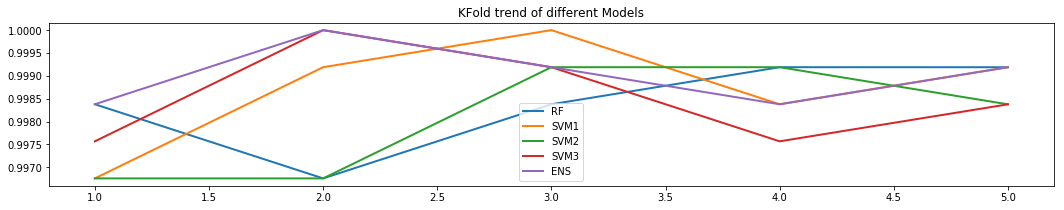

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

fig= plt.figure(figsize=(18,3))
plt.plot( [1,2,3,4,5], scores_RF, linewidth=2,label="RF")
plt.plot( [1,2,3,4,5], scores_svm1, linewidth=2,label="SVM1")
plt.plot( [1,2,3,4,5], scores_svm2, linewidth=2,label="SVM2")
plt.plot( [1,2,3,4,5], scores_svm3, linewidth=2,label="SVM3")
plt.plot( [1,2,3,4,5], scores_ens, linewidth=2,label="ENS")
plt.legend()
plt.title("KFold trend of different Models")



Text(0.5, 1.0, 'Bar plot of accuracy')

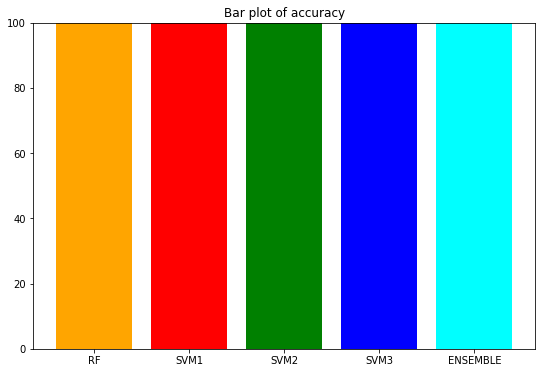

In [27]:
import numpy as np
accuracy_listnp = np.array(accuracy_list)
accuracy_listnp = accuracy_listnp * 100

fig= plt.figure(figsize=(9,6))
plt.ylim( (0, 100) ) 
plt.bar([1,2,3,4,5],accuracy_listnp,color=['orange', 'red', 'green', 'blue', 'cyan'])
plt.xticks([1,2,3,4,5], ('RF', 'SVM1', 'SVM2', 'SVM3', 'ENSEMBLE'))
plt.title("Bar plot of accuracy")

<Figure size 864x432 with 0 Axes>

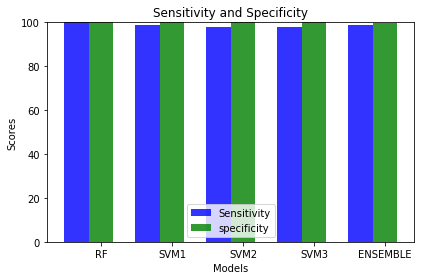

In [28]:
fig= plt.figure(figsize=(12,6))

# data to plot
n_groups = 5
sensitivity_scorenp = np.array(sensitivity_score)
sensitivity_scorenp = sensitivity_scorenp * 100
specificity_scorenp = np.array(specificity_score)
specificity_scorenp = specificity_scorenp * 100

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, sensitivity_scorenp, bar_width,
alpha=opacity,
color='b',
label='Sensitivity')

rects2 = plt.bar(index + bar_width, specificity_scorenp, bar_width,
alpha=opacity,
color='g',
label='specificity')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Sensitivity and Specificity')
plt.xticks(index + bar_width, ('RF', 'SVM1', 'SVM2', 'SVM3', 'ENSEMBLE'))
plt.ylim(0,100)
plt.legend()

plt.tight_layout()
plt.show()

# MRMR

In [29]:
mrmr_feature = [['energy_psd', 'zcr_ca4', 'mean_ca2', 'std_fftw', 'var_fftw', 'zcr_cd1', 'rms_ca2', 'zcr_ca2', 'rms_fft', 'mean_fftw', 'rms_cd1', 'energy_fft', 'zcr_ca1', 'mean_cd1', 'rms_ca1', 'rms_fftw', 'mean_ca3', 'mean_ca1', 'rms_ca3', 'mean_fft', 'zcr_ca3', 'rms', 'mean_ca4', 'std_fft', 'var_fft', 'zcr', 'rms_ca4', 'skew_ca4', 'std_ca2', 'energy_fftw', 'mcr', 'ac0', 'skew_ca3', 'CF_ca4', 'mcr_ca1', 'skew_ca2', 'mcr_ca2', 'std', 'mode_fftw', 'CF_ca3', 'ac36', 'skew_ca1', 'var', 'std_ca4', 'kurt_ca4', 'CF_ca2', 'energy', 'ac103', 'mcr_cd1', 'skew'],['energy_psd', 'zcr_ca4', 'mean_ca2', 'std_fftw', 'var_fftw', 'zcr_cd1', 'rms_ca2', 'zcr_ca2', 'rms_fft', 'mean_fftw', 'rms_cd1', 'energy_fft', 'zcr_ca1', 'mean_cd1', 'rms_ca1', 'rms_fftw', 'mean_ca3', 'mean_ca1', 'rms_ca3', 'mean_fft', 'zcr_ca3', 'rms', 'mean_ca4', 'std_fft', 'var_fft', 'zcr', 'rms_ca4', 'skew_ca4', 'std_ca2', 'energy_fftw', 'mcr', 'ac0', 'skew_ca3', 'CF_ca4', 'mcr_ca1', 'skew_ca2', 'mcr_ca2', 'std', 'mode_fftw', 'CF_ca3'],['energy_psd', 'zcr_ca4', 'mean_ca2', 'std_fftw', 'var_fftw', 'zcr_cd1', 'rms_ca2', 'zcr_ca2', 'rms_fft', 'mean_fftw', 'rms_cd1', 'energy_fft', 'zcr_ca1', 'mean_cd1', 'rms_ca1', 'rms_fftw', 'mean_ca3', 'mean_ca1', 'rms_ca3', 'mean_fft', 'zcr_ca3', 'rms', 'mean_ca4', 'std_fft', 'var_fft', 'zcr', 'rms_ca4', 'skew_ca4', 'std_ca2', 'energy_fftw'],['energy_psd', 'zcr_ca4', 'mean_ca2', 'std_fftw', 'var_fftw', 'zcr_cd1', 'rms_ca2', 'zcr_ca2', 'rms_fft', 'mean_fftw', 'rms_cd1', 'energy_fft', 'zcr_ca1', 'mean_cd1', 'rms_ca1', 'rms_fftw', 'mean_ca3', 'mean_ca1', 'rms_ca3', 'mean_fft'],['energy_psd', 'zcr_ca4', 'mean_ca2', 'std_fftw', 'var_fftw', 'zcr_cd1', 'rms_ca2', 'zcr_ca2', 'rms_fft', 'mean_fftw']]

In [30]:
training_score = []
test_score = []
sensitivity = []
specificity = []
i = 0
for fea_set in mrmr_feature:
    print("*************************************************")
    print(F"features in use - \n { fea_set }")
    try:
        del X_train,clfrf,clf_svm1_lin,clf_svm_rbf,ensemble
    except NameError as e:
        pass
    X_train = df_feature[fea_set]
    y_train = df_feature['label']
    X_test = df_featuret[fea_set]
    y_test = df_featuret['label']
    #scale
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    scaler.fit(X_test)
    X_test = scaler.transform(X_test)
    #RF
    RFC_METRIC = 'entropy'  #metric used for RandomForrestClassifier
    NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
    NO_JOBS = -1 #number of parallel jobs used for RandomForrestClassifier
    clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                                 random_state=2000,
                                 criterion=RFC_METRIC,
                                 n_estimators=NUM_ESTIMATORS,
                                 verbose=False)

    scores_rf = cross_val_score(clf, X_train, y_train, cv=5)
    training_score.append(scores_rf)
    print(F"training score for RF is - { scores_rf }")
    clf.fit(X_train,y_train)
    pred1 = clf.predict(X_test)
    acc_score_rf = accuracy_score(y_test,pred1)
    test_score.append(acc_score_rf)
    print(F"test acc_score for RF is - { acc_score_rf }")
    #Confusion matrix
    cm = confusion_matrix(y_test,pred1)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_rf = TP / (TP + FN)
    Specificity_rf = TN / (TN + FP)

    print(F"Sensitivity for RF is { Sensitivity_rf }")
    print(F"Specificity for RF is { Specificity_rf }")
    
    sensitivity.append(Sensitivity_rf)
    specificity.append(Specificity_rf)
    
    #SVM linear
    
    clf_svm1 = svm.SVC(kernel='linear', C=1)
    scores_svm1 = cross_val_score(clf_svm1, X_train, y_train, cv=5)
    training_score.append(scores_svm1)
    print(F"training score for svm linear is - { scores_svm1 }")
    clf_svm1.fit(X_train,y_train)
    pred2 = clf_svm1.predict(X_test)
    acc_score_svm1 = accuracy_score(y_test,pred2)
    print(F"test acc_score for svm linear is - { acc_score_svm1 }")
    test_score.append(acc_score_svm1)
    #Confusion matrix
    cm = confusion_matrix(y_test,pred2)
    TP = cm[0][0] 
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_svm1 = TP / (TP + FN)
    Specificity_svm1 = TN / (TN + FP)

    print(F"Sensitivity for svm linear is { Sensitivity_svm1 }")
    print(F"Specificity for svm linear is { Specificity_svm1 }")
    
    sensitivity.append(Sensitivity_svm1)
    specificity.append(Specificity_svm1)
    
    #SVM rbf
    clf_svm2 = svm.SVC(kernel='rbf', C=1)
    scores_svm2 = cross_val_score(clf_svm2, X_train, y_train, cv=5)
    training_score.append(scores_svm2)
    print(F"training score for svm rbf is - { scores_svm2 }")
    clf_svm2.fit(X_train,y_train)
    pred3 = clf_svm2.predict(X_test)
    acc_score_svm2 = accuracy_score(y_test,pred3)
    print(F"test acc_score for svm rbf is - { acc_score_svm2 }")
    test_score.append(acc_score_svm2)
    #Confusion matrix
    cm = confusion_matrix(y_test,pred3)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_svm2 = TP / (TP + FN)
    Specificity_svm2 = TN / (TN + FP)

    print(F"Sensitivity for svm rbf is { Sensitivity_svm2 }")
    print(F"Specificity for svm rbf is { Specificity_svm2 }")
    
    sensitivity.append(Sensitivity_svm2)
    specificity.append(Specificity_svm2)
    #svm3
    clf_svm3 = svm.SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)
    scores_svm3 = cross_val_score(clf_svm3, X_train, y_train, cv=5)
    print(F"training score for svm rbf is - { scores_svm3 }")
    training_score.append(scores_svm3)
    clf_svm3.fit(X_train,y_train)
    pred4 = clf_svm3.predict(X_test)
    acc_score_svm3 = accuracy_score(y_test,pred4)
    print(F"test acc_score for svm rbf is - { acc_score_svm3 }")
    test_score.append(acc_score_svm3)
    cm = confusion_matrix(y_test,pred4)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_svm3 = TP / (TP + FN)
    Specificity_svm3 = TN / (TN + FP)

    print(F"Sensitivity for svm rbf is { Sensitivity_svm3 }")
    print(F"Specificity for svm rbf is { Specificity_svm3 }")
    
    sensitivity.append(Sensitivity_svm3)
    specificity.append(Specificity_svm3)
    #ensemble
    estimators = []
    estimators.append(('rf', clf))
    estimators.append(('svm', clf_svm1))
    estimators.append(('svm3', clf_svm3))
    # create the ensemble model
    ensemble = VotingClassifier(estimators)
    scores_ens = cross_val_score(ensemble, X_train, y_train, cv=5)
    training_score.append(scores_ens)
    print(F"score for eensemble is - { scores_ens }")
    ensemble.fit(X_train,y_train)
    pred4 = ensemble.predict(X_test)
    acc_score_ens = accuracy_score(y_test,pred4)   
    print(F"acc_score for ensemble is - { acc_score_ens }")
    test_score.append(acc_score_ens)
    cm = confusion_matrix(y_test,pred4)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_ens = TP / (TP + FN)
    Specificity_ens = TN / (TN + FP)
    sensitivity.append(Sensitivity_ens)
    specificity.append(Specificity_ens)

    print(F"Sensitivity for ensemble is { Sensitivity_ens }")
    print(F"Specificity for ensemble is { Specificity_ens }")
    
    

*************************************************
features in use - 
 ['energy_psd', 'zcr_ca4', 'mean_ca2', 'std_fftw', 'var_fftw', 'zcr_cd1', 'rms_ca2', 'zcr_ca2', 'rms_fft', 'mean_fftw', 'rms_cd1', 'energy_fft', 'zcr_ca1', 'mean_cd1', 'rms_ca1', 'rms_fftw', 'mean_ca3', 'mean_ca1', 'rms_ca3', 'mean_fft', 'zcr_ca3', 'rms', 'mean_ca4', 'std_fft', 'var_fft', 'zcr', 'rms_ca4', 'skew_ca4', 'std_ca2', 'energy_fftw', 'mcr', 'ac0', 'skew_ca3', 'CF_ca4', 'mcr_ca1', 'skew_ca2', 'mcr_ca2', 'std', 'mode_fftw', 'CF_ca3', 'ac36', 'skew_ca1', 'var', 'std_ca4', 'kurt_ca4', 'CF_ca2', 'energy', 'ac103', 'mcr_cd1', 'skew']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


training score for RF is - [0.99675588 0.99594485 0.99351176 0.99756691 0.99594156]
test acc_score for RF is - 0.984
Sensitivity for RF is 1.0
Specificity for RF is 0.9825897714907508
training score for svm linear is - [0.98459043 0.98864558 0.98864558 0.98459043 0.98376623]
test acc_score for svm linear is - 0.982
Sensitivity for svm linear is 0.9759036144578314
Specificity for svm linear is 0.9825517993456925


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.99270073 0.9918897  0.99675588 0.99432279 0.99269481]
test acc_score for svm rbf is - 0.983
Sensitivity for svm rbf is 0.9761904761904762
Specificity for svm rbf is 0.9836244541484717
training score for svm rbf is - [0.98134631 0.98459043 0.98621249 0.98296837 0.98782468]
test acc_score for svm rbf is - 0.965
Sensitivity for svm rbf is 0.9305555555555556
Specificity for svm rbf is 0.9676724137931034
score for eensemble is - [0.98621249 0.98864558 0.98945661 0.98621249 0.98944805]
acc_score for ensemble is - 0.977
Sensitivity for ensemble is 0.9743589743589743
Specificity for ensemble is 0.9772234273318872
*************************************************
features in use - 
 ['energy_psd', 'zcr_ca4', 'mean_ca2', 'std_fftw', 'var_fftw', 'zcr_cd1', 'rms_ca2', 'zcr_ca2', 'rms_fft', 'mean_fftw', 'rms_cd1', 'energy_fft', 'zcr_ca1', 'mean_cd1', 'rms_ca1', 'rms_fftw', 'mean_ca3', 'mean_ca1', 'rms_ca3', 'mean_fft', 'zcr_ca3', 'rms', 'mean_ca4', 'std_fft', 'var

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


training score for RF is - [0.99675588 0.99270073 0.99513382 0.99513382 0.99269481]
test acc_score for RF is - 0.989
Sensitivity for RF is 1.0
Specificity for RF is 0.9879649890590809
training score for svm linear is - [0.98621249 0.99026764 0.98540146 0.98459043 0.98214286]
test acc_score for svm linear is - 0.967
Sensitivity for svm linear is 0.9210526315789473
Specificity for svm linear is 0.9707792207792207


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.9918897  0.99026764 0.99351176 0.99270073 0.99025974]
test acc_score for svm rbf is - 0.975
Sensitivity for svm rbf is 0.9615384615384616
Specificity for svm rbf is 0.9761388286334056
training score for svm rbf is - [0.98053528 0.98134631 0.97891322 0.98215734 0.98376623]
test acc_score for svm rbf is - 0.96
Sensitivity for svm rbf is 0.9130434782608695
Specificity for svm rbf is 0.9634801288936627
score for eensemble is - [0.98621249 0.99026764 0.98702352 0.98702352 0.98701299]
acc_score for ensemble is - 0.967
Sensitivity for ensemble is 0.9210526315789473
Specificity for ensemble is 0.9707792207792207
*************************************************
features in use - 
 ['energy_psd', 'zcr_ca4', 'mean_ca2', 'std_fftw', 'var_fftw', 'zcr_cd1', 'rms_ca2', 'zcr_ca2', 'rms_fft', 'mean_fftw', 'rms_cd1', 'energy_fft', 'zcr_ca1', 'mean_cd1', 'rms_ca1', 'rms_fftw', 'mean_ca3', 'mean_ca1', 'rms_ca3', 'mean_fft', 'zcr_ca3', 'rms', 'mean_ca4', 'std_fft', 'var_

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.98783455 0.98702352 0.98945661 0.98621249 0.98863636]
test acc_score for svm rbf is - 0.971
Sensitivity for svm rbf is 0.9722222222222222
Specificity for svm rbf is 0.9709051724137931
training score for svm rbf is - [0.97972425 0.97161395 0.97485807 0.97729116 0.97727273]
test acc_score for svm rbf is - 0.947
Sensitivity for svm rbf is 0.94
Specificity for svm rbf is 0.9473684210526315
score for eensemble is - [0.98215734 0.97323601 0.97891322 0.97972425 0.97727273]
acc_score for ensemble is - 0.952
Sensitivity for ensemble is 0.9622641509433962
Specificity for ensemble is 0.9514255543822597
*************************************************
features in use - 
 ['energy_psd', 'zcr_ca4', 'mean_ca2', 'std_fftw', 'var_fftw', 'zcr_cd1', 'rms_ca2', 'zcr_ca2', 'rms_fft', 'mean_fftw', 'rms_cd1', 'energy_fft', 'zcr_ca1', 'mean_cd1', 'rms_ca1', 'rms_fftw', 'mean_ca3', 'mean_ca1', 'rms_ca3', 'mean_fft']
training score for RF is - [0.98540146 0.98296837 0.9789132

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.9756691  0.97404704 0.97404704 0.97891322 0.97483766]
test acc_score for svm rbf is - 0.941
Sensitivity for svm rbf is 0.8392857142857143
Specificity for svm rbf is 0.9470338983050848
training score for svm rbf is - [0.96999189 0.95782644 0.96512571 0.96593674 0.9650974 ]
test acc_score for svm rbf is - 0.925
Sensitivity for svm rbf is 0.775
Specificity for svm rbf is 0.93125
score for eensemble is - [0.97404704 0.9594485  0.9675588  0.9675588  0.96672078]
acc_score for ensemble is - 0.929
Sensitivity for ensemble is 0.8095238095238095
Specificity for ensemble is 0.9342379958246346
*************************************************
features in use - 
 ['energy_psd', 'zcr_ca4', 'mean_ca2', 'std_fftw', 'var_fftw', 'zcr_cd1', 'rms_ca2', 'zcr_ca2', 'rms_fft', 'mean_fftw']
training score for RF is - [0.98296837 0.9837794  0.98134631 0.98296837 0.97564935]
test acc_score for RF is - 0.954
Sensitivity for RF is 0.9473684210526315
Specificity for RF is 0.95440

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.97729116 0.9675588  0.9756691  0.97648013 0.97483766]
test acc_score for svm rbf is - 0.936
Sensitivity for svm rbf is 0.8
Specificity for svm rbf is 0.9439153439153439
training score for svm rbf is - [0.96999189 0.95782644 0.96431468 0.96674777 0.9650974 ]
test acc_score for svm rbf is - 0.925
Sensitivity for svm rbf is 0.7894736842105263
Specificity for svm rbf is 0.9303534303534303
score for eensemble is - [0.97080292 0.95863747 0.96512571 0.96918086 0.9650974 ]
acc_score for ensemble is - 0.926
Sensitivity for ensemble is 0.7948717948717948
Specificity for ensemble is 0.931321540062435


# Recursive Feature Elimination
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [31]:
from sklearn.feature_selection import RFE


In [32]:
df_feature = shuffle(df_feature)

X_train_full = df_feature.drop(['label'],axis=1)
all_features = X_train_full.columns
y_train_full = df_feature['label']

scaler = StandardScaler()
scaler.fit(X_train_full)
X_train_full = scaler.transform(X_train_full)
y_train_full = np.array(y_train_full)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [33]:
clf_svm_rfe = svm.SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


for ix in [20,30,40,50,60]:
    del X_train,X_test,y_train,y_test
    rfe = RFE(clf_svm_rfe, ix)
    fit = rfe.fit(X_train_full,y_train_full)
    best_fea = fit.ranking_
    index = []
    for i in range(0,len(best_fea)):
        if int(best_fea[i]) == 1:
            index.append(i)
    best_feature = []
    for k in index:
        best_feature.append(all_features[k])
    X_train = df_feature[best_feature]
    #print(X_train.shape)
    X_test = df_featuret[best_feature]
    #print(X_test.shape)
    y_train = df_feature['label']
    y_test = df_featuret['label']
    scaler1 = StandardScaler()
    scaler1.fit(X_train)
    X_train = scaler1.transform(X_train)
    #print(X_train.shape)
    scaler2 = StandardScaler()
    scaler2.fit(X_test)
    X_test = scaler2.transform(X_test)
    scores_svm_rfe = cross_val_score(clf_svm_rfe, X_train, y_train, cv=5)
    print(F"training score for { len(best_feature) } feature is - { scores_svm_rfe }")
    clf_svm_rfe.fit(X_train,y_train)
    pred_rfe = clf_svm_rfe.predict(X_test)
    acc_score_rfe = accuracy_score(y_test,pred_rfe)
    print(F"test acc_score for svm linear is - { acc_score_rfe }")
    #Confusion matrix
    cm = confusion_matrix(y_test,pred_rfe)
    TP = cm[0][0] 
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_rfe = TP / (TP + FN)
    Specificity_rfe = TN / (TN + FP)

    print(F"Sensitivity for svm linear is { Sensitivity_rfe }")
    print(F"Specificity for svm linear is { Specificity_rfe }")
   

training score for 20 feature is - [0.99756691 0.99918897 0.99918897 0.99918897 0.99837662]
test acc_score for svm linear is - 0.998
Sensitivity for svm linear is 1.0
Specificity for svm linear is 0.9977900552486187
training score for 30 feature is - [0.99756691 0.99837794 0.99918897 0.99918897 0.99837662]
test acc_score for svm linear is - 0.999
Sensitivity for svm linear is 1.0
Specificity for svm linear is 0.9988938053097345
training score for 40 feature is - [0.99837794 0.99918897 1.         1.         0.99837662]
test acc_score for svm linear is - 0.997
Sensitivity for svm linear is 0.9795918367346939
Specificity for svm linear is 0.9988913525498891
training score for 50 feature is - [0.99837794 0.99918897 1.         1.         0.99918831]
test acc_score for svm linear is - 0.998
Sensitivity for svm linear is 0.9896907216494846
Specificity for svm linear is 0.9988925802879292
training score for 60 feature is - [0.99918897 0.99918897 1.         1.         0.99837662]
test acc_score

# Feature Importance

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
import numpy as np

In [35]:
df_feature = shuffle(df_feature)

X_train_full = df_feature.drop(['label'],axis=1)
y_train_full = df_feature['label']

model = ExtraTreesClassifier()
model.fit(X_train_full,y_train_full)

feat_importances = pd.Series(model.feature_importances_, index=X_train_full.columns)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
training_score = []
test_score = []
sensitivity = []
specificity = []
NOF = []

In [37]:
for fea in [10,20,30,40,50,60]:
    feature_importance = pd.Index.tolist(feat_importances.nlargest(fea).index)
    fea_set = feature_importance
    NOF.append(len(fea_set))
    print("*************************************************")
    print(F"features in use - \n { fea_set }")
    try:
        del X_train,clfrf,clf_svm1_lin,clf_svm_rbf,ensemble
    except NameError as e:
        pass
    X_train = df_feature[fea_set]
    y_train = df_feature['label']
    X_test = df_featuret[fea_set]
    y_test = df_featuret['label']
    #scale
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    scaler.fit(X_test)
    X_test = scaler.transform(X_test)
    #RF
    RFC_METRIC = 'entropy'  #metric used for RandomForrestClassifier
    NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
    NO_JOBS = -1 #number of parallel jobs used for RandomForrestClassifier
    clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                                 random_state=2000,
                                 criterion=RFC_METRIC,
                                 n_estimators=NUM_ESTIMATORS,
                                 verbose=False)

    scores_rf = cross_val_score(clf, X_train, y_train, cv=5)
    training_score.append(scores_rf)
    print(F"training score for RF is - { scores_rf }")
    clf.fit(X_train,y_train)
    pred1 = clf.predict(X_test)
    acc_score_rf = accuracy_score(y_test,pred1)
    test_score.append(acc_score_rf)
    print(F"test acc_score for RF is - { acc_score_rf }")
    #Confusion matrix
    cm = confusion_matrix(y_test,pred1)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_rf = TP / (TP + FN)
    Specificity_rf = TN / (TN + FP)

    print(F"Sensitivity for RF is { Sensitivity_rf }")
    print(F"Specificity for RF is { Specificity_rf }")
    
    sensitivity.append(Sensitivity_rf)
    specificity.append(Specificity_rf)
    
    #SVM linear
    
    clf_svm1 = svm.SVC(kernel='linear', C=1)
    scores_svm1 = cross_val_score(clf_svm1, X_train, y_train, cv=5)
    training_score.append(scores_svm1)
    print(F"training score for svm linear is - { scores_svm1 }")
    clf_svm1.fit(X_train,y_train)
    pred2 = clf_svm1.predict(X_test)
    acc_score_svm1 = accuracy_score(y_test,pred2)
    print(F"test acc_score for svm linear is - { acc_score_svm1 }")
    test_score.append(acc_score_svm1)
    #Confusion matrix
    cm = confusion_matrix(y_test,pred2)
    TP = cm[0][0] 
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_svm1 = TP / (TP + FN)
    Specificity_svm1 = TN / (TN + FP)

    print(F"Sensitivity for svm linear is { Sensitivity_svm1 }")
    print(F"Specificity for svm linear is { Specificity_svm1 }")
    
    sensitivity.append(Sensitivity_svm1)
    specificity.append(Specificity_svm1)
    
    #SVM rbf
    clf_svm2 = svm.SVC(kernel='rbf', C=1)
    scores_svm2 = cross_val_score(clf_svm2, X_train, y_train, cv=5)
    training_score.append(scores_svm2)
    print(F"training score for svm rbf is - { scores_svm2 }")
    clf_svm2.fit(X_train,y_train)
    pred3 = clf_svm2.predict(X_test)
    acc_score_svm2 = accuracy_score(y_test,pred3)
    print(F"test acc_score for svm rbf is - { acc_score_svm2 }")
    test_score.append(acc_score_svm2)
    #Confusion matrix
    cm = confusion_matrix(y_test,pred3)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_svm2 = TP / (TP + FN)
    Specificity_svm2 = TN / (TN + FP)

    print(F"Sensitivity for svm rbf is { Sensitivity_svm2 }")
    print(F"Specificity for svm rbf is { Specificity_svm2 }")
    
    sensitivity.append(Sensitivity_svm2)
    specificity.append(Specificity_svm2)
    #svm3
    clf_svm3 = svm.SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)
    scores_svm3 = cross_val_score(clf_svm3, X_train, y_train, cv=5)
    print(F"training score for svm rbf is - { scores_svm3 }")
    training_score.append(scores_svm3)
    clf_svm3.fit(X_train,y_train)
    pred4 = clf_svm3.predict(X_test)
    acc_score_svm3 = accuracy_score(y_test,pred4)
    print(F"test acc_score for svm rbf is - { acc_score_svm3 }")
    test_score.append(acc_score_svm3)
    cm = confusion_matrix(y_test,pred4)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_svm3 = TP / (TP + FN)
    Specificity_svm3 = TN / (TN + FP)

    print(F"Sensitivity for svm rbf is { Sensitivity_svm3 }")
    print(F"Specificity for svm rbf is { Specificity_svm3 }")
    
    sensitivity.append(Sensitivity_svm3)
    specificity.append(Specificity_svm3)
    #ensemble
    estimators = []
    estimators.append(('rf', clf))
    estimators.append(('svm', clf_svm1))
    estimators.append(('svm3', clf_svm3))
    # create the ensemble model
    ensemble = VotingClassifier(estimators)
    scores_ens = cross_val_score(ensemble, X_train, y_train, cv=5)
    training_score.append(scores_ens)
    print(F"score for eensemble is - { scores_ens }")
    ensemble.fit(X_train,y_train)
    pred4 = ensemble.predict(X_test)
    acc_score_ens = accuracy_score(y_test,pred4)   
    print(F"acc_score for ensemble is - { acc_score_ens }")
    test_score.append(acc_score_ens)
    cm = confusion_matrix(y_test,pred4)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_ens = TP / (TP + FN)
    Specificity_ens = TN / (TN + FP)
    sensitivity.append(Sensitivity_ens)
    specificity.append(Specificity_ens)

    print(F"Sensitivity for ensemble is { Sensitivity_ens }")
    print(F"Specificity for ensemble is { Specificity_ens }")

*************************************************
features in use - 
 ['ac24', 'ac26', 'ac27', 'ac80', 'energy_ca4', 'ac113', 'ac98', 'ac91', 'ac146', 'ac145']
training score for RF is - [0.99837794 0.99513382 0.99837794 0.99756691 0.99594156]
test acc_score for RF is - 0.997
Sensitivity for RF is 0.9795918367346939
Specificity for RF is 0.9988913525498891
training score for svm linear is - [0.99513382 0.99675588 0.99432279 0.99837794 0.99512987]
test acc_score for svm linear is - 0.996
Sensitivity for svm linear is 0.9696969696969697
Specificity for svm linear is 0.9988901220865705


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.99756691 0.99675588 0.99837794 0.99675588 0.99512987]
test acc_score for svm rbf is - 0.996
Sensitivity for svm rbf is 0.9696969696969697
Specificity for svm rbf is 0.9988901220865705
training score for svm rbf is - [0.99432279 0.99351176 0.99270073 0.99270073 0.99188312]
test acc_score for svm rbf is - 0.994
Sensitivity for svm rbf is 0.9789473684210527
Specificity for svm rbf is 0.9955801104972376
score for eensemble is - [0.99513382 0.99513382 0.99432279 0.99675588 0.99512987]
acc_score for ensemble is - 0.996
Sensitivity for ensemble is 0.979381443298969
Specificity for ensemble is 0.9977851605758582
*************************************************
features in use - 
 ['ac24', 'ac26', 'ac27', 'ac80', 'energy_ca4', 'ac113', 'ac98', 'ac91', 'ac146', 'ac145', 'ac5', 'ac72', 'ac97', 'mcr_fftw', 'ac116', 'ac130', 'ac112', 'ac19', 'ac23', 'kurt_ca4']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


training score for RF is - [1.         0.99675588 0.99756691 0.99837794 0.99594156]
test acc_score for RF is - 0.998
Sensitivity for RF is 0.9896907216494846
Specificity for RF is 0.9988925802879292
training score for svm linear is - [0.99675588 0.99675588 0.99432279 0.99432279 0.99431818]
test acc_score for svm linear is - 0.997
Sensitivity for svm linear is 0.9895833333333334
Specificity for svm linear is 0.9977876106194691


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.99837794 0.99513382 0.99756691 0.99918897 0.99594156]
test acc_score for svm rbf is - 0.996
Sensitivity for svm rbf is 0.979381443298969
Specificity for svm rbf is 0.9977851605758582
training score for svm rbf is - [0.99594485 0.99351176 0.99270073 0.99513382 0.99350649]
test acc_score for svm rbf is - 0.994
Sensitivity for svm rbf is 0.9789473684210527
Specificity for svm rbf is 0.9955801104972376
score for eensemble is - [0.99675588 0.99594485 0.99351176 0.99675588 0.99431818]
acc_score for ensemble is - 0.996
Sensitivity for ensemble is 0.979381443298969
Specificity for ensemble is 0.9977851605758582
*************************************************
features in use - 
 ['ac24', 'ac26', 'ac27', 'ac80', 'energy_ca4', 'ac113', 'ac98', 'ac91', 'ac146', 'ac145', 'ac5', 'ac72', 'ac97', 'mcr_fftw', 'ac116', 'ac130', 'ac112', 'ac19', 'ac23', 'kurt_ca4', 'ac49', 'std_fft', 'ac89', 'ac102', 'ac46', 'ac141', 'ac42', 'ac133', 'ac25', 'ac75']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


training score for RF is - [0.99918897 0.99594485 0.99837794 0.99837794 0.99675325]
test acc_score for RF is - 0.998
Sensitivity for RF is 0.9896907216494846
Specificity for RF is 0.9988925802879292
training score for svm linear is - [0.99675588 0.99756691 0.99756691 0.99594485 0.99512987]
test acc_score for svm linear is - 0.997
Sensitivity for svm linear is 0.9795918367346939
Specificity for svm linear is 0.9988913525498891


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.99837794 0.99513382 0.99756691 0.99837794 0.99594156]
test acc_score for svm rbf is - 0.996
Sensitivity for svm rbf is 0.979381443298969
Specificity for svm rbf is 0.9977851605758582
training score for svm rbf is - [0.99675588 0.99513382 0.99432279 0.99513382 0.99350649]
test acc_score for svm rbf is - 0.994
Sensitivity for svm rbf is 0.9690721649484536
Specificity for svm rbf is 0.9966777408637874
score for eensemble is - [0.99675588 0.99675588 0.99675588 0.99675588 0.99594156]
acc_score for ensemble is - 0.997
Sensitivity for ensemble is 0.9795918367346939
Specificity for ensemble is 0.9988913525498891
*************************************************
features in use - 
 ['ac24', 'ac26', 'ac27', 'ac80', 'energy_ca4', 'ac113', 'ac98', 'ac91', 'ac146', 'ac145', 'ac5', 'ac72', 'ac97', 'mcr_fftw', 'ac116', 'ac130', 'ac112', 'ac19', 'ac23', 'kurt_ca4', 'ac49', 'std_fft', 'ac89', 'ac102', 'ac46', 'ac141', 'ac42', 'ac133', 'ac25', 'ac75', 'ac93', 'CF_fft',

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


training score for RF is - [0.99918897 0.99675588 0.99837794 0.99837794 0.99675325]
test acc_score for RF is - 0.998
Sensitivity for RF is 0.9896907216494846
Specificity for RF is 0.9988925802879292
training score for svm linear is - [0.99918897 0.99756691 0.99756691 0.99837794 0.99675325]
test acc_score for svm linear is - 0.998
Sensitivity for svm linear is 0.9896907216494846
Specificity for svm linear is 0.9988925802879292


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.99837794 0.99513382 0.99756691 0.99837794 0.99594156]
test acc_score for svm rbf is - 0.996
Sensitivity for svm rbf is 0.979381443298969
Specificity for svm rbf is 0.9977851605758582
training score for svm rbf is - [0.99675588 0.99675588 0.99432279 0.99513382 0.99512987]
test acc_score for svm rbf is - 0.996
Sensitivity for svm rbf is 0.979381443298969
Specificity for svm rbf is 0.9977851605758582
score for eensemble is - [0.99918897 0.99675588 0.99675588 0.99837794 0.99675325]
acc_score for ensemble is - 0.998
Sensitivity for ensemble is 0.9896907216494846
Specificity for ensemble is 0.9988925802879292
*************************************************
features in use - 
 ['ac24', 'ac26', 'ac27', 'ac80', 'energy_ca4', 'ac113', 'ac98', 'ac91', 'ac146', 'ac145', 'ac5', 'ac72', 'ac97', 'mcr_fftw', 'ac116', 'ac130', 'ac112', 'ac19', 'ac23', 'kurt_ca4', 'ac49', 'std_fft', 'ac89', 'ac102', 'ac46', 'ac141', 'ac42', 'ac133', 'ac25', 'ac75', 'ac93', 'CF_fft', 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


training score for RF is - [0.99918897 0.99675588 1.         0.99837794 0.99594156]
test acc_score for RF is - 1.0
Sensitivity for RF is 1.0
Specificity for RF is 1.0
training score for svm linear is - [0.99918897 0.99756691 0.99918897 0.99756691 0.99512987]
test acc_score for svm linear is - 0.999
Sensitivity for svm linear is 0.9897959183673469
Specificity for svm linear is 1.0


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.99918897 0.99594485 0.99918897 0.99837794 0.99594156]
test acc_score for svm rbf is - 0.999
Sensitivity for svm rbf is 0.9897959183673469
Specificity for svm rbf is 1.0
training score for svm rbf is - [0.99756691 0.99675588 0.99756691 0.99756691 0.99512987]
test acc_score for svm rbf is - 0.996
Sensitivity for svm rbf is 0.9603960396039604
Specificity for svm rbf is 1.0
score for eensemble is - [0.99918897 0.99756691 1.         0.99756691 0.99512987]
acc_score for ensemble is - 0.999
Sensitivity for ensemble is 0.9897959183673469
Specificity for ensemble is 1.0
*************************************************
features in use - 
 ['ac24', 'ac26', 'ac27', 'ac80', 'energy_ca4', 'ac113', 'ac98', 'ac91', 'ac146', 'ac145', 'ac5', 'ac72', 'ac97', 'mcr_fftw', 'ac116', 'ac130', 'ac112', 'ac19', 'ac23', 'kurt_ca4', 'ac49', 'std_fft', 'ac89', 'ac102', 'ac46', 'ac141', 'ac42', 'ac133', 'ac25', 'ac75', 'ac93', 'CF_fft', 'ac126', 'ac118', 'ac149', 'ac73', 'std_psd

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


training score for RF is - [1.         0.99675588 1.         0.99918897 0.99756494]
test acc_score for RF is - 1.0
Sensitivity for RF is 1.0
Specificity for RF is 1.0
training score for svm linear is - [1.         0.99756691 0.99837794 0.99675588 0.99675325]
test acc_score for svm linear is - 0.994
Sensitivity for svm linear is 0.9789473684210527
Specificity for svm linear is 0.9955801104972376


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.99918897 0.99675588 1.         0.99837794 0.99756494]
test acc_score for svm rbf is - 0.998
Sensitivity for svm rbf is 0.9896907216494846
Specificity for svm rbf is 0.9988925802879292
training score for svm rbf is - [0.99837794 0.99756691 0.99837794 0.99837794 0.99756494]
test acc_score for svm rbf is - 0.999
Sensitivity for svm rbf is 0.9897959183673469
Specificity for svm rbf is 1.0
score for eensemble is - [1.         0.99756691 0.99837794 0.99837794 0.99756494]
acc_score for ensemble is - 1.0
Sensitivity for ensemble is 1.0
Specificity for ensemble is 1.0
